In [13]:
#Importa o panda, o image e o pyplot do matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#Chama e da nome a planilha
storm_data=pd.read_excel("C:/Users/Eduardo Q Marques/Documents/My Jobs/Doutorado/Campo vento/planilha_campo_vento2019_B.xlsx")

In [15]:
#Ver a planilha
storm_data

,Unnamed: 0,Placa,parcela,linha,transecto,cicatriz,alt_cic,caiu _com_vento?,direcao,tipo_de_dano,altura_quebra,obs
0,1,29520.0,a,NaN,a,NaN,NaN,n,NaN,q,4.5,queda por lianas presas em arvore que caiu
1,2,4916.0,a,NaN,a,NaN,NaN,s,39.0,q,4.5,NaN
2,3,25941.0,a,NaN,a,NaN,NaN,s,39.0,q,3.0,bf 4916
3,4,4851.0,a,NaN,aa,NaN,NaN,s,NaN,c,NaN,NaN
4,5,57812.0,a,NaN,aa,NaN,NaN,s,NaN,c,NaN,NaN
5,6,57826.0,b,NaN,aa,n,NaN,s,NaN,c,NaN,NaN
6,7,71945.0,b,NaN,a,n,NaN,s,7.0,q,2.2,NaN
7,8,57483.0,b,NaN,a,n,NaN,s,301.0,q,3.5,NaN
8,9,72519.0,b,NaN,aa,n,NaN,s,294.0,r,NaN,raiz não exposta
9,10,72362.0,b,NaN,a,n,NaN,s,23.0,q,4.3,NaN


In [16]:
#Resume a tabela
storm_data.describe()


,Unnamed: 0,Placa,linha,alt_cic,direcao,altura_quebra
count,656.000000,307.000000,104.000000,60.000000,224.000000,158.000000
mean,330.039634,34071.107492,17.951923,1.085000,281.558036,4.234494
std,189.989325,29266.855709,8.564297,0.820051,103.325799,3.494349
min,1.000000,9.000000,1.000000,0.100000,0.000000,0.100000
25%,165.750000,5917.000000,9.750000,0.500000,290.000000,1.500000
50%,330.500000,31261.000000,19.000000,0.950000,319.500000,3.350000
75%,494.250000,72519.500000,26.000000,1.500000,339.250000,6.000000
max,658.000000,74553.000000,30.000000,4.500000,359.000000,15.000000


In [17]:
#Mudar nome das variaveis do tipo de dano (q,r,c)
#Criar dicionario
new_names = {'tipo_de_dano':{
    'q':'Snapped',
    'r':'Uprooted',
    'c':'Crown damage'
    }}

#Trocar nome na planilha
storm_data.replace(new_names, inplace=True)

#Count das categorias (Para dados categoricos ex: quebrada, copa, raiz)
tipo_dano = storm_data['tipo_de_dano'].value_counts()

#Separar os dados de tipo de dano por plot
tipo_dano_a = storm_data[storm_data['parcela']=='a']['tipo_de_dano'].value_counts()
                         
tipo_dano_b = storm_data[storm_data['parcela']=='b' ]['tipo_de_dano'].value_counts()
                        
tipo_dano_c = storm_data[storm_data['parcela']=='c'] ['tipo_de_dano'].value_counts()

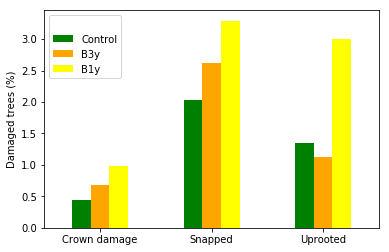

In [18]:
#Cria funcoao para pegar dados por parcela
def get_by_parcela(name):
    parcelas = {'c':'B1y',
    'b':'B3y',
    'a':'Control'}
    df = storm_data[storm_data['parcela']==name]['tipo_de_dano'].value_counts()
    df['area'] = parcelas[name]
    return df

def json_d(df):
    return {
            'Snapped':df['Snapped'],
            'Uprooted':df['Uprooted'],
            'Crown damage':df['Crown damage'],
            ' ':df['area']
        }

parcelas = ['a','b','c']


all_data =[json_d(x) for x in [get_by_parcela(y) for y in parcelas ]]
df_all = pd.DataFrame(all_data)
df_all=df_all.set_index(' ')
df_all=df_all.T
df_all.Control = df_all.Control*100/2955
df_all.B3y = df_all.B3y*100/1603
df_all.B1y = df_all.B1y*100/1731
df_all.plot.bar(color = ['green','orange','yellow'])
plt.ylabel('Damaged trees (%)')
plt.xticks(rotation='0')
plt.savefig('storm_dano_plot',dpi=300)

In [20]:
df_all.describe()

,Control,B3y,B1y
count,3.000000,3.000000,3.000000
mean,1.274676,1.476398,2.426343
std,0.798197,1.014244,1.259070
min,0.439932,0.686213,0.982091
25%,0.896785,0.904554,1.993068
50%,1.353638,1.122895,3.004044
75%,1.692047,1.871491,3.148469
max,2.030457,2.620087,3.292894


In [21]:
#Salva do tipo de dano para todos os plots
tipo_dano.plot.bar(color = ['r','g','b'])
plt.ylabel('Numbers of trees')
plt.xlabel('Damage')
plt.title('Kind of damage')
plt.xticks(rotation='0')
plt.savefig('storm_dano_total.png',dpi=300)
plt.close()

#Salva do tipo de dano para o plot A
tipo_dano_a.plot.bar(color = ['r','g','b'])
plt.ylabel('Numbers of trees')
plt.xlabel('Damage')
plt.title('Kind of damage (Control)')
plt.xticks(rotation='0')
plt.savefig('storm_dano_a.png',dpi=300)
plt.close()

#Salva do tipo de dano para o plot B
tipo_dano_b.plot.bar(color = ['r','g','b'])
plt.ylabel('Numbers of trees')
plt.xlabel('Damage')
plt.title('Kind of damage (B3y)')
plt.xticks(rotation='0')
plt.savefig('storm_dano_b.png',dpi=300)
plt.close()

#Salva do tipo de dano para o plot C
tipo_dano_c.plot.bar(color = ['r','g','b'])
plt.ylabel('Numbers of trees')
plt.xlabel('Damage')
plt.title('Kind of damage (B1y)')
plt.xticks(rotation='0')
plt.savefig('storm_dano_c.png',dpi=300)
plt.close()

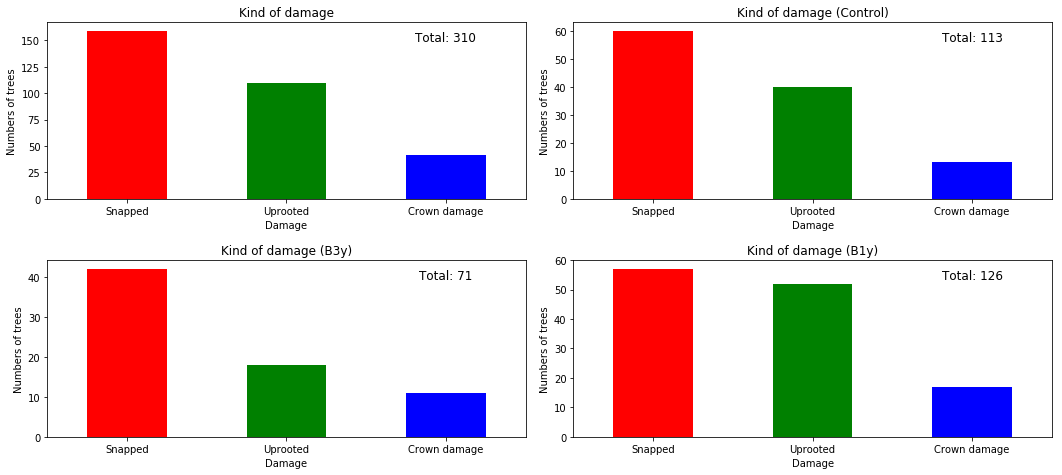

In [22]:
#Salva do tipo de dano para todos os plots
plt.figure(figsize=(18, 12))

plt.subplot(321)
tipo_dano.plot.bar(color = ['r','g','b'])
plt.text(2, tipo_dano.max(), f'Total: {tipo_dano.sum()}',
          size=12,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.ylabel('Numbers of trees')
plt.xlabel('Damage')
plt.title('Kind of damage')
plt.xticks(rotation='0')
# plt.savefig('storm_dano_total.png',dpi=300)
# plt.close()

#Salva do tipo de dano para o plot A
plt.subplot(322)
tipo_dano_a.plot.bar(color = ['r','g','b'])
plt.text(2, tipo_dano_a.max(), f'Total: {tipo_dano_a.sum()}',
          size=12,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.ylabel('Numbers of trees')
plt.xlabel('Damage')
plt.title('Kind of damage (Control)')
plt.xticks(rotation='0')
# plt.savefig('storm_dano_a.png',dpi=300)
# plt.close()

#Salva do tipo de dano para o plot B
plt.subplot(323)
tipo_dano_b.plot.bar(color = ['r','g','b'])
plt.text(2, tipo_dano_b.max(), f'Total: {tipo_dano_b.sum()}',
          size=12,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.ylabel('Numbers of trees')
plt.xlabel('Damage')
plt.title('Kind of damage (B3y)')
plt.xticks(rotation='0')
# plt.savefig('storm_dano_b.png',dpi=300)
# plt.close()

#Salva do tipo de dano para o plot C
plt.subplot(324)
tipo_dano_c.plot.bar(color = ['r','g','b'])
plt.text(2, tipo_dano_c.max(), f'Total: {tipo_dano_c.sum()}',
          size=12,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.ylabel('Numbers of trees')
plt.xlabel('Damage')
plt.title('Kind of damage (B1y)')
plt.xticks(rotation='0')
plt.subplots_adjust(hspace=0.35,
                    wspace=0.1)

plt.savefig('storm_dano_all.png',dpi=300)
